# Explorer le corpus

## Imports

In [232]:
import os
import yake

from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np
import yake

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
nlp = spacy.load('fr_core_news_md')

In [256]:
# Stopwords 
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "faire", "qu'il", "d'un", "d'une", "avis", 
       "c'est", "ans", "cas", "qu'ils", "jour"]
sw = set(sw)

## Compter le nombre de documents dans le corpus

In [257]:
#to access data : 
data_path = "../data/txt/"
files = os.listdir(data_path)

In [258]:
len(files)

2829

In [259]:
# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_1913')]
len(bxl_files)

36

In [260]:
# Choisir une année
year = 1913

In [261]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1913_Tome_I1_Part_1.txt',
 'Bxl_1913_Tome_I1_Part_10.txt',
 'Bxl_1913_Tome_I1_Part_11.txt',
 'Bxl_1913_Tome_I1_Part_12.txt',
 'Bxl_1913_Tome_I1_Part_2.txt',
 'Bxl_1913_Tome_I1_Part_3.txt',
 'Bxl_1913_Tome_I1_Part_4.txt',
 'Bxl_1913_Tome_I1_Part_5.txt',
 'Bxl_1913_Tome_I1_Part_6.txt',
 'Bxl_1913_Tome_I1_Part_7.txt',
 'Bxl_1913_Tome_I1_Part_8.txt',
 'Bxl_1913_Tome_I1_Part_9.txt',
 'Bxl_1913_Tome_I2_1_Part_1.txt',
 'Bxl_1913_Tome_I2_1_Part_10.txt',
 'Bxl_1913_Tome_I2_1_Part_2.txt',
 'Bxl_1913_Tome_I2_1_Part_3.txt',
 'Bxl_1913_Tome_I2_1_Part_4.txt',
 'Bxl_1913_Tome_I2_1_Part_5.txt',
 'Bxl_1913_Tome_I2_1_Part_6.txt',
 'Bxl_1913_Tome_I2_1_Part_7.txt',
 'Bxl_1913_Tome_I2_1_Part_8.txt',
 'Bxl_1913_Tome_I2_1_Part_9.txt',
 'Bxl_1913_Tome_I2_2_Part_1.txt',
 'Bxl_1913_Tome_I2_2_Part_10.txt',
 'Bxl_1913_Tome_I2_2_Part_11.txt',
 'Bxl_1913_Tome_I2_2_Part_2.txt',
 'Bxl_1913_Tome_I2_2_Part_3.txt',
 'Bxl_1913_Tome_I2_2_Part_4.txt',
 'Bxl_1913_Tome_I2_2_Part_5.txt',
 'Bxl_1913_Tome_I2_2_Part_6.txt'

In [262]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [263]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

36

In [264]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [242]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before

'V I L L E\n\nD E\n\nB R U X E L L E S .\n\nB U L L E T I N COMMUNAL\n•\n\n»Ô«\n\n—\n\nANNÉE\n\n1913\n\nP R E M I È R E\n\nP A R T I E\n\nTOME I\n\nC O M P T E\n\nR E N D U\n\nD E S\n\nS É A N C E S\n\nB R U X E L L E S\nTYPOGRAPHIE\n\nET L I T H O G R A P H I E\n\n12, rue P a c h é c o ,\n\n1«\n\nE.\n\nGUYOT\n\n\x0cBULLETIN\n\nCONSEIL\nSconce k\nPresideoce de M. Ä\n\n\x0cN°l.\n\nCOMPTE RENDU DE LA SÉANCE DU 1 3 JANVIER 1 9 1 3 .\n\nVILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN\nAnnée\n\nC O N S E I L\nSéance\n\nCOMMUNAL\n1913.\n\nC O M M U N A L\n\ndu 1 3 Janvier 1 9 1 3 .\n\nP r é s i d e n c e de M . A D O L P H E M A X , Bourgmestre.\n\nSOMMAIRE :\n\n1\n2\n3\n4.\n5.\n6.\n7.\n8\n\nPAGES.\nCommunication\n. . . .\n4\nPersonnel de l\'Administration communale. — D é l é g a t i o n\nà donner au Collège pour la nomination à divers\nemplois. — Adoption\n7\nRue Ernest-Allard — Prolongement vers la place Poelaert. — Id\n7,5\'J\nRue du Lombard. — Modification d\'alignement — Jd. .\n7\nEcoles professi

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [291]:
#sans considerer stop words et liste de mots à ignorer:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() and w.lower() not in sw and w.lower() not in ignored ]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [292]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1913_clean.txt!'

In [293]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:200]

'communal année tome typographie guyot bulletin sconce presideoce compte rendu séance janvier bulletin année séance communal janvier sommaire pages communication personnel administration communale donn'

## Extraire les mots clés 

In [294]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [295]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text.lower())

In [296]:
keywords

[('francs', 0.0011497530653743443),
 ('conseil', 0.0014268193557297874),
 ('collège', 0.0018132150553017488),
 ('conseil communal', 0.003237728805308092),
 ('hospices', 0.0034303286390976895),
 ("qu'il", 0.003761614419163108),
 ('avis favorable', 0.003980306541826666),
 ('pension', 0.00400916583577501),
 ('bourgmestre', 0.0041377389015999555),
 ('conseil général', 0.0041399378704433335),
 ('cas', 0.0042144565630097865),
 ('messieurs', 0.004308661073402269),
 ('concerts', 0.0046725500081294),
 ('ville', 0.0050849781827529625),
 ('service', 0.0051962111007894584),
 ('proposition', 0.005269380975042549),
 ('question', 0.005415543668212824),
 ('subside', 0.005719392181109296),
 ("d'un", 0.0058262988493718105),
 ('avril', 0.006165034935911359),
 ("d'une", 0.00619378359746985),
 ('mars', 0.006429495258037039),
 ('services', 0.006455898640374782),
 ("c'est", 0.006603178368440599),
 ('droit', 0.00664909733502693),
 ('services publics', 0.006734171151614927),
 ('avis', 0.006899850346306117),
 (

## Nettoyer à nouveau le fichier : stop words et mots à ignorer (à l'aide d'une fonction de nettoyage)

In [297]:
# Stopwords 
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "faire", "qu'il", "d'un", "d'une", "avis", 
       "c'est", "ans", "cas", "qu'ils", "jour"]
sw = set(sw)

In [333]:
# Création d'une liste de mots à ignorer
ignored = set(["Collège", "collège", "francs", "Bourgmestre","Messieurs","VILLE", "Conseil", "conseil communal", 
               "conseil général", "conseil", "conseil communal", "général", "d'un","d'une", "c'est", "ordinaires", 
               "chapitre", "titres", "recette dépense", "services", "dépenses", "dépense", "dépenses dépenses prévues", 
               "déficit recette dépense", "recette dépense prévue", "boni recette dépense", "dépense recette boni", 
               "recettes recettes", "dépenses dépenses", "qu'on", "depenses dépenses recettes", 
               "vases sacrés ordinaires", "sacrés ordinaires", "dépenses ordinaires qu'on", 
               "depenses dépenses recettes", "recettes imprévues. dépenses", "dit", "vue", "n’est", "avons", 
               "d’une","rue", "Den Nest", "commune", "qu’il", "question", "ville", "c’est", "mais", "den Nest", 
               "total", "art", "l'article", "Bourgmestre", "bourgmestre", "Messieurs", "VILLE", "prix", "Bruxelles",
               "bruxelles", "messieurs", "é p a r", "é d i t", "p r é", "q u é", "é t é", "q u i", "q u ' i", "ê t r", 
               "œ u v r e", "D E S BIENS", "Remerciements", "q u e","DÉSIGNATION D E S BIENS", "é t r "])
ignored

{'Bourgmestre',
 'Bruxelles',
 'Collège',
 'Conseil',
 'D E S BIENS',
 'Den Nest',
 'DÉSIGNATION D E S BIENS',
 'Messieurs',
 'Remerciements',
 'VILLE',
 'art',
 'avons',
 'boni recette dépense',
 'bourgmestre',
 'bruxelles',
 "c'est",
 'chapitre',
 'collège',
 'commune',
 'conseil',
 'conseil communal',
 'conseil général',
 'c’est',
 "d'un",
 "d'une",
 'den Nest',
 'depenses dépenses recettes',
 'dit',
 'déficit recette dépense',
 'dépense',
 'dépense recette boni',
 'dépenses',
 'dépenses dépenses',
 'dépenses dépenses prévues',
 "dépenses ordinaires qu'on",
 'd’une',
 'francs',
 'général',
 "l'article",
 'mais',
 'messieurs',
 'n’est',
 'ordinaires',
 'p r é',
 'prix',
 "q u ' i",
 'q u e',
 'q u i',
 'q u é',
 "qu'on",
 'question',
 'qu’il',
 'recette dépense',
 'recette dépense prévue',
 'recettes imprévues. dépenses',
 'recettes recettes',
 'rue',
 'sacrés ordinaires',
 'services',
 'titres',
 'total',
 'vases sacrés ordinaires',
 'ville',
 'vue',
 'é d i t',
 'é p a r',
 'é t r 

In [325]:
# Ne garder que les bonnes mots
kept = []
for kw, score in keywords:
    words = kw.split()
    if kw.lower() not in ignored and kw.lower() not in sw:
        kept.append(kw)
kept

['hospices',
 'avis favorable',
 'pension',
 'concerts',
 'service',
 'proposition',
 'subside',
 'avril',
 'mars',
 'droit',
 'services publics',
 'budget',
 'musiciens',
 'crédits supplémentaires',
 'pensions',
 "l'honorable bourgmestre",
 'publics',
 'taxe',
 'section',
 'favorable',
 'caisse',
 'lieu',
 "l'honorable",
 "l'echevin",
 "l'honneur",
 "d'un crédit supplémentaire"]

## Nuage de mots

In [326]:
frequencies = Counter(after.split())
print(frequencies.most_common(50))

[('service', 1390), ('cours', 1257), ('frais', 1212), ('travaux', 1204), ('hospices', 1163), ('communal', 1059), ('école', 1021), ('echevin', 886), ('administration', 846), ('entretien', 845), ('ans', 844), ('année', 830), ('heures', 811), ('saint', 805), ('budget', 802), ('recettes', 793), ('compte', 778), ('avis', 773), ('etc', 737), ('article', 730), ('section', 689), ('personnel', 677), ('enfants', 653), ('nombre', 643), ('société', 633), ('place', 630), ('écoles', 620), ('ecole', 619), ('subside', 598), ('traitement', 595), ('etat', 592), ('demande', 564), ('divers', 555), ('publique', 551), ('lieu', 538), ('membres', 538), ('hôpital', 535), ('exercice', 523), ('élèves', 515), ('voir', 508), ('favorable', 507), ('somme', 498), ('juillet', 496), ('ouvriers', 493), ('droit', 487), ('rapport', 485), ('terrain', 481), ('octobre', 481), ('séance', 476), ('charges', 469)]


### Créer, stocker et afficher le nuage de mots

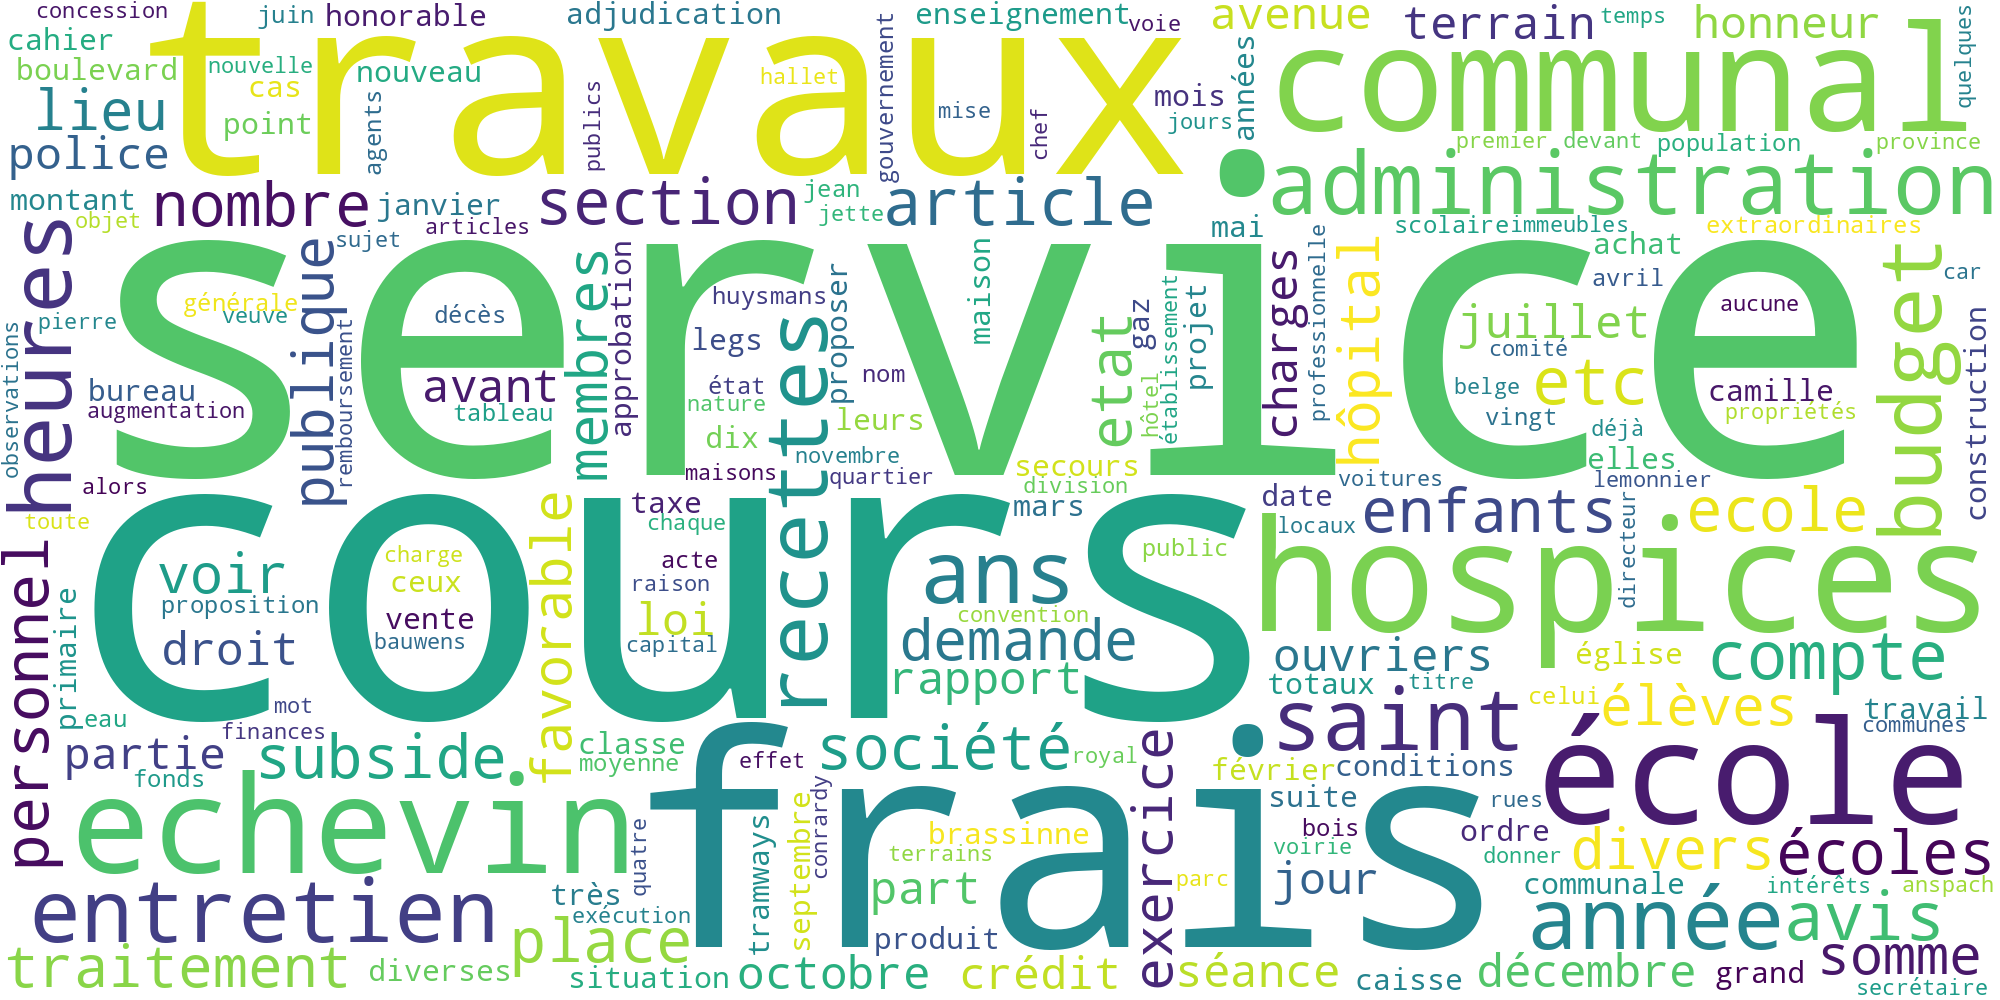

In [303]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{1913}.png"))
Image(filename=os.path.join(temp_path, f"{1913}.png"))

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [320]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 10.7 s, sys: 198 ms, total: 10.9 s
Wall time: 10.9 s


In [334]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3 and ent.text not in sw and ent.text not in ignored:
        people[ent.text] += 1

In [335]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Camille Huysmans apparait 16 fois dans le corpus
Echevin apparait 13 fois dans le corpus
Hubert apparait 9 fois dans le corpus
Claes apparait 8 fois dans le corpus
Verheven apparait 8 fois dans le corpus
Echevin Maes apparait 8 fois dans le corpus
M. Jauquet apparait 7 fois dans le corpus
Anspach-Puissant apparait 7 fois dans le corpus
Adoption apparait 6 fois dans le corpus
Jauquet apparait 6 fois dans le corpus
Smets apparait 6 fois dans le corpus
Boon apparait 6 fois dans le corpus
Budget apparait 5 fois dans le corpus
Desmet apparait 5 fois dans le corpus
Huisman apparait 5 fois dans le corpus
Depage apparait 5 fois dans le corpus
Burthoul apparait 4 fois dans le corpus
Hymans apparait 4 fois dans le corpus
Dassonville apparait 4 fois dans le corpus
Echevin Jacqmain apparait 4 fois dans le corpus
M. l'Echevin Jacqmain apparait 4 fois dans le corpus
Levêque apparait 4 fois dans le corpus
Jacqmain apparait 3 fois dans le corpus
Bauwens apparait 3 fois dans le corpus
Jules Anspach app

# Sentiment analysis 

In [122]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [ ]:
get_sentiment("Ensuite de cette entente, l'entrepreneur a pris rengagement de pousser ses travaux avec toute l'activité désirable.")

In [ ]:
get_sentiment("Toutes les indemnités allouées aux expropriés étant consignées, il sera loisible à l'Etat de prendre possession des immeubles dont il a fait poursuivre l'expropriation..")

In [ ]:
get_sentiment("Ce sont les immeubles qui dépendent de la Caisse générale de Reports et de Dépôts.")

In [ ]:
get_sentiment("Ces dépendances sont comprises dans la zone d'expropriation.")

In [ ]:
get_sentiment("Je n'entends pas les relever toutes aujourd'hui et je me contenterai de vous parler de la question des cheminées qui a été l'objet de polémiques.")

In [ ]:
get_sentiment("Pourquoi ne pas déléguer quelques membres du Conseil pour se rendre compte de l a situation et de l'exactitude de mes affirmations ?")

In [ ]:
get_sentiment("Voici cette réponse.")

In [ ]:
get_sentiment("Ce travail parait donner des résultats inespérés, comme les «témoins» d'essai l'indiquent.")

In [ ]:
get_sentiment("On ne peut méconnaître plus complètement la vérité.")

In [ ]:
get_sentiment("Le cahier des charges prévoyait les conditions d'épuisement.")